In [1]:
import pandas as pd
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.neural_network import MLPClassifier
# from IPython.display import display
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("D:/Gerina Mary C/ML_Project/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
dups = df.duplicated()
duplicate_rows = df[df.duplicated()]
duplicate_rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df.dropna(subset=['person_emp_length'], inplace=True)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [8]:
avg_loan_int_rate = df['loan_int_rate'].mean()
avg_loan_int_rate

11.045384723343041

In [9]:
df['loan_int_rate'].fillna(avg_loan_int_rate, inplace=True)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [10]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
label_encoder = LabelEncoder()
df['cb_person_default_on_file']=label_encoder.fit_transform(df['cb_person_default_on_file'])
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int32
cb_person_cred_hist_length      int64
dtype: object

In [12]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,0,26


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((21124, 11), (10405, 11))

In [15]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int32
cb_person_cred_hist_length      int64
dtype: object

In [16]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
18377,32,66000,RENT,4.0,HOMEIMPROVEMENT,A,20000,8.900000,0.30,0,9
8834,24,42000,RENT,2.0,EDUCATION,B,8000,11.045385,0.19,0,4
22941,28,60000,MORTGAGE,8.0,MEDICAL,B,20000,11.710000,0.33,0,5
12936,23,80000,RENT,3.0,VENTURE,B,12000,10.590000,0.15,0,4
16362,24,62400,RENT,8.0,VENTURE,B,20000,11.120000,0.32,0,2


In [17]:
import category_encoders as ce

In [18]:
encoder = ce.OrdinalEncoder(cols=['person_home_ownership', 'loan_intent', 'loan_grade'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
18377,32,66000,1,4.0,1,1,20000,8.900000,0.30,0,9
8834,24,42000,1,2.0,2,2,8000,11.045385,0.19,0,4
22941,28,60000,2,8.0,3,2,20000,11.710000,0.33,0,5
12936,23,80000,1,3.0,4,2,12000,10.590000,0.15,0,4
16362,24,62400,1,8.0,4,2,20000,11.120000,0.32,0,2


In [20]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
27925,27,39000,2,11.0,1,5,5000,18.79,0.13,1,10
14828,25,115731,2,3.0,1,1,7200,7.14,0.06,0,4
32196,38,17280,3,0.0,4,4,1000,16.29,0.06,1,13
26385,31,100000,2,0.0,1,1,15000,9.63,0.15,0,7
5725,23,23340,1,8.0,2,1,5300,7.90,0.23,0,3


In [21]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership           int32
person_emp_length             float64
loan_intent                     int32
loan_grade                      int32
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int32
cb_person_cred_hist_length      int64
dtype: object

In [22]:
X_train_gru = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_gru = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [23]:
model = Sequential()
model.add(GRU(32, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X_train_gru, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


661/661 [==============================] - 12s 12ms/step - loss: 0.4764 - accuracy: 0.7962 - val_loss: 0.4394 - val_accuracy: 0.8156
Epoch 2/100
661/661 [==============================] - 7s 10ms/step - loss: 0.4273 - accuracy: 0.8188 - val_loss: 0.4078 - val_accuracy: 0.8310
Epoch 3/100
661/661 [==============================] - 6s 10ms/step - loss: 0.3904 - accuracy: 0.8333 - val_loss: 0.3789 - val_accuracy: 0.8434
Epoch 4/100
661/661 [==============================] - 7s 10ms/step - loss: 0.3663 - accuracy: 0.8514 - val_loss: 0.3663 - val_accuracy: 0.8507
Epoch 5/100
661/661 [==============================] - 7s 11ms/step - loss: 0.3613 - accuracy: 0.8556 - val_loss: 0.3681 - val_accuracy: 0.8554
Epoch 6/100
661/661 [==============================] - 7s 11ms/step - loss: 0.3551 - accuracy: 0.8608 - val_loss: 0.3592 - val_accuracy: 0.8577
Epoch 7/100
661/661 [==============================] - 7s 11ms/step - loss: 0.3488 - accuracy: 0.8639 - val_loss: 0.3481 - val_accura

661/661 [==============================] - 8s 12ms/step - loss: 0.2632 - accuracy: 0.9105 - val_loss: 0.2746 - val_accuracy: 0.9041
Epoch 55/100
661/661 [==============================] - 8s 12ms/step - loss: 0.2627 - accuracy: 0.9106 - val_loss: 0.2664 - val_accuracy: 0.9105
Epoch 56/100
661/661 [==============================] - 8s 12ms/step - loss: 0.2624 - accuracy: 0.9103 - val_loss: 0.2742 - val_accuracy: 0.9084
Epoch 57/100
661/661 [==============================] - 8s 12ms/step - loss: 0.2612 - accuracy: 0.9107 - val_loss: 0.2687 - val_accuracy: 0.9099
Epoch 58/100
661/661 [==============================] - 7s 11ms/step - loss: 0.2633 - accuracy: 0.9107 - val_loss: 0.2686 - val_accuracy: 0.9123
Epoch 59/100
661/661 [==============================] - 7s 11ms/step - loss: 0.2597 - accuracy: 0.9119 - val_loss: 0.2636 - val_accuracy: 0.9134
Epoch 60/100
661/661 [==============================] - 8s 12ms/step - loss: 0.2582 - accuracy: 0.9121 - val_loss: 0.2646 - val_accuracy: 0.911

In [26]:
loss, accuracy = model.evaluate(X_test_gru, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

326/326 [==============================] - 2s 4ms/step - loss: 0.2621 - accuracy: 0.9124
Test Loss: 0.2621335983276367
Test Accuracy: 0.9124459624290466


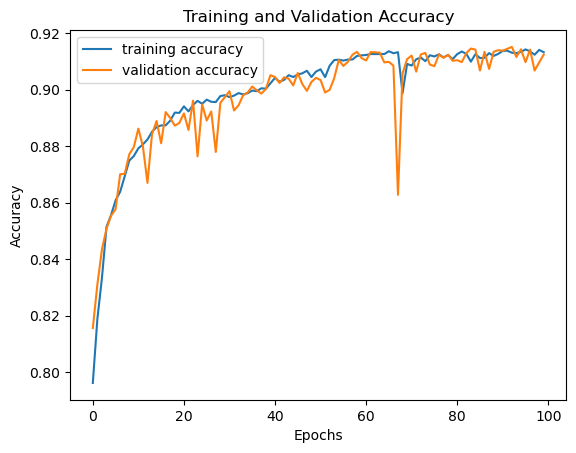

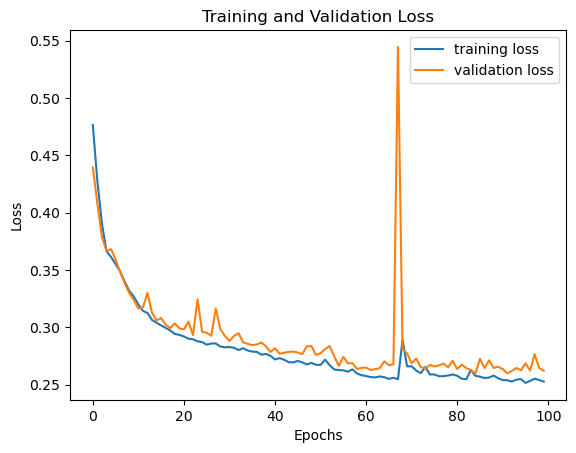

In [27]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
661/661 [==============================] - 12s 13ms/step - loss: 0.4827 - accuracy: 0.7927 - val_loss: 0.4422 - val_accuracy: 0.8184
Epoch 2/100
661/661 [==============================] - 8s 12ms/step - loss: 0.4387 - accuracy: 0.8134 - val_loss: 0.4321 - val_accuracy: 0.8195
Epoch 3/100
661/661 [==============================] - 8s 12ms/step - loss: 0.4304 - accuracy: 0.8159 - val_loss: 0.4223 - val_accuracy: 0.8303
Epoch 4/100
661/661 [==============================] - 8s 12ms/step - loss: 0.4198 - accuracy: 0.8212 - val_loss: 0.4096 - val_accuracy: 0.8322
Epoch 5/100
661/661 [==============================] - 8s 12ms/step - loss: 0.4011 - accuracy: 0.8310 - val_loss: 0.3778 - val_accuracy: 0.8426
Epoch 6/100
661/661 [==============================] - 8s 12ms/step - loss: 0.3690 - accuracy: 0.8493 - val_loss: 0.3679 - val_accuracy: 0.8478
Epoch 7/100
661/661 [==============================] - 8s 12ms/step - loss: 0.3456 - accuracy: 0.8660 - val_loss: 0.3354 - val_accuracy

661/661 [==============================] - 8s 12ms/step - loss: 0.2560 - accuracy: 0.9113 - val_loss: 0.2645 - val_accuracy: 0.9133
Epoch 58/100
661/661 [==============================] - 8s 12ms/step - loss: 0.2547 - accuracy: 0.9122 - val_loss: 0.2664 - val_accuracy: 0.9126
Epoch 59/100
661/661 [==============================] - 8s 12ms/step - loss: 0.2578 - accuracy: 0.9114 - val_loss: 0.2845 - val_accuracy: 0.9017
Epoch 60/100
661/661 [==============================] - 8s 12ms/step - loss: 0.2583 - accuracy: 0.9109 - val_loss: 0.2648 - val_accuracy: 0.9112
Epoch 61/100
661/661 [==============================] - 8s 12ms/step - loss: 0.2521 - accuracy: 0.9136 - val_loss: 0.2679 - val_accuracy: 0.9112
Epoch 62/100
661/661 [==============================] - 8s 12ms/step - loss: 0.2529 - accuracy: 0.9134 - val_loss: 0.2655 - val_accuracy: 0.9098
Epoch 63/100
661/661 [==============================] - 8s 12ms/step - loss: 0.2542 - accuracy: 0.9123 - val_loss: 0.2691 - val_accuracy: 0.910

In [32]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

326/326 [==============================] - 2s 5ms/step - loss: 0.2706 - accuracy: 0.9110
Test Loss: 0.2705934941768646
Test Accuracy: 0.9110043048858643


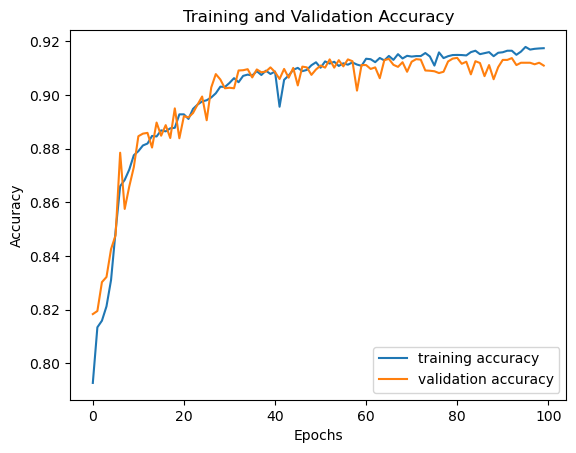

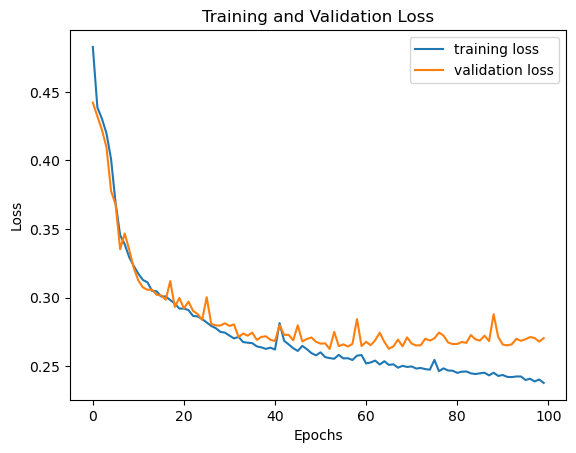

In [33]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))




Epoch 1/100
661/661 [==============================] - 6s 6ms/step - loss: 33.6313 - accuracy: 0.7284 - val_loss: 55.7353 - val_accuracy: 0.7860
Epoch 2/100
661/661 [==============================] - 5s 7ms/step - loss: 8.4251 - accuracy: 0.7358 - val_loss: 2.6609 - val_accuracy: 0.7418
Epoch 3/100
661/661 [==============================] - 4s 6ms/step - loss: 4.6306 - accuracy: 0.7296 - val_loss: 1.1939 - val_accuracy: 0.8163
Epoch 4/100
661/661 [==============================] - 4s 6ms/step - loss: 2.4315 - accuracy: 0.7358 - val_loss: 0.7696 - val_accuracy: 0.8218
Epoch 5/100
661/661 [==============================] - 4s 7ms/step - loss: 1.3993 - accuracy: 0.7439 - val_loss: 0.6062 - val_accuracy: 0.7940
Epoch 6/100
661/661 [==============================] - 5s 7ms/step - loss: 0.7847 - accuracy: 0.7654 - val_loss: 1.0234 - val_accuracy: 0.8271
Epoch 7/100
661/661 [==============================] - 5s 7ms/step - loss: 0.5867 - accuracy: 0.7883 - val_loss: 0.5307 - val_accuracy: 0.8

Epoch 57/100
661/661 [==============================] - 3s 5ms/step - loss: 0.5232 - accuracy: 0.7831 - val_loss: 0.5193 - val_accuracy: 0.7860
Epoch 58/100
661/661 [==============================] - 4s 6ms/step - loss: 0.5230 - accuracy: 0.7831 - val_loss: 0.5193 - val_accuracy: 0.7860
Epoch 59/100
661/661 [==============================] - 4s 5ms/step - loss: 0.5230 - accuracy: 0.7831 - val_loss: 0.5193 - val_accuracy: 0.7860
Epoch 60/100
661/661 [==============================] - 3s 5ms/step - loss: 0.5230 - accuracy: 0.7831 - val_loss: 0.5203 - val_accuracy: 0.7860
Epoch 61/100
661/661 [==============================] - 3s 5ms/step - loss: 0.5232 - accuracy: 0.7831 - val_loss: 0.5192 - val_accuracy: 0.7860
Epoch 62/100
661/661 [==============================] - 4s 6ms/step - loss: 0.5230 - accuracy: 0.7831 - val_loss: 0.5195 - val_accuracy: 0.7860
Epoch 63/100
661/661 [==============================] - 4s 5ms/step - loss: 0.5232 - accuracy: 0.7831 - val_loss: 0.5193 - val_accuracy:

In [35]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

326/326 [==============================] - 1s 3ms/step - loss: 0.5197 - accuracy: 0.7860
Test Loss: 0.5197246670722961
Test Accuracy: 0.7859683036804199


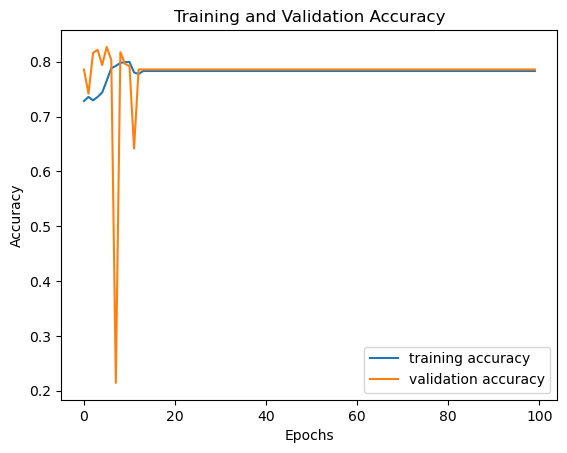

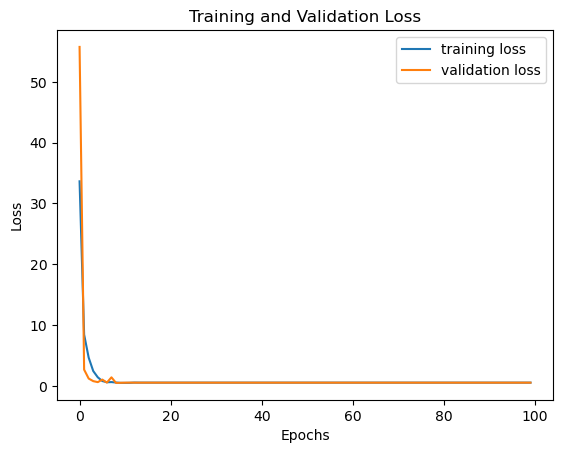

In [36]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
# Assume you have your data stored in X and y variables, where X contains the features and y contains the labels (0 for low risk, 1 for high risk)

# Splitting data into training and testing sets

# Standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, activation='relu', solver='adam', random_state=42)

# Training the model
history = mlp.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9062950504565113
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8178
           1       0.85      0.68      0.76      2227

    accuracy                           0.91     10405
   macro avg       0.89      0.82      0.85     10405
weighted avg       0.90      0.91      0.90     10405

